<head><h1 align="center">
Film Production Industry
</h1></head>

<head><h3 align="center">Analysis with Insights Provided by the Yelp API</h3></head>

For over a centery, film, television & media production was ubiquitous in, and almost exclusive to, two major US metropolises: Los Angeles and New York. Over the past several decades, there have been many developments that have cracked this exclusivity: The advent of the internet has increased access to entertainment, while simultaneously inspiring a new generation of creators. Other advances in technology have allowed film-industry-standard production quality to be capable with devices that are commonplace with today's consumer. Further, state governments have begun competing to attract business with tax credits designed to lure productions to within their borders, where no production industry existed before. <br><br>

With the help of business insights provided by the Yelp API, we will take a glimpse at this industry, comparing companies that offer production services in a few locations. Out goal is to find what business opportunities appear to be present within this industry, and ultimately, develop a business with what we find.<br><br>

If we could create the perfect business, it would be popular and loved to the point of being a house-hold brand, which everyone finds welcome in their lives. The only way to do this is to ensure that the service that we provide is so excellent, that our customers love us with no reservation for the cost, because we would be providing something that is incredibly valuable.

In [304]:
import json # Jake, can we get rid of import json and sys for this notebook?
import sys
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt 
# !{sys.executable} -m pip install folium

import folium
%matplotlib inline

#### For visitors:

- Please import the packages above to run the code throughout the page below.
- All of the functions we developed to pull lots of data from the Yelp API are housed in the ```/code``` folder in the main repository. 
- If you would like to use our functions, you will need your own Yelp API developer client ID and API key, which you may attain [here!](https://www.yelp.com/developers/documentation/v3/get_started)

# Our Data Collecting Method

We have used our ```yelp_call(_)```, ```parse_data(_)```, and ```call_1000(_)``` functions to fetch all of our business data — 
- They *call* the Yelp API using user input for ```term```, ```location```, and ```categories```. 
- From there, they *parse the data* in to a ```python``` list of tuples, with each tuple containing individual business name, address, rating, review count, price, and some other information that can be received by changing the parameters in ```url_params```. 
- Finally, we use the third function to circumvent the necessity to manually offset our call each time, as the Yelp API only allows a maximum limit of 50 businesses returned with each call.
  - After gathering the data from the call, the last function also writes the collected data to a csv in the ```/database``` folder. The file is automatically named using the ```term``` and ```location``` variables which were input by the user at the beginning.

We have other functions that we used to call the Yelp API to gather example reviews for each business collected by the above method, which we will come back to later, but for now...

Lets read our film production data in to this document.

In [305]:
df_fp_ny = pd.read_csv('database/Film Production_NYC_database.csv') 
df_fp_la = pd.read_csv('database/Film Production_Los Angeles_database.csv')
df_fp_ga = pd.read_csv('database/Film Production_Atlanta_database.csv')

In [306]:
df_fp_la.tail(3)

,Name,Address,City,Rating,Review Count,Coordinates,Price,Id,Categories
997,FunLovinCamera,"['Glendale, CA 91206']",Glendale,5.0,119,"{'latitude': 34.1660842895508, 'longitude': -1...",NaN,HT837BNGI49eAhc1gcGiVg,"[{'alias': 'eventphotography', 'title': 'Event..."
998,Printefex,"['456 Foothill Blvd', 'Ste B', 'La Canada Flin...",La Canada Flintridge,4.5,100,"{'latitude': 34.19874, 'longitude': -118.18839}",NaN,t_eid75T-RVOz2GBTqXKiw,"[{'alias': 'copyshops', 'title': 'Printing Ser..."
999,Rebecca Blue Media,"['Rancho Cucamonga, CA 91730']",Rancho Cucamonga,4.5,16,"{'latitude': 34.10246, 'longitude': -117.58408}",NaN,OxuwVhB0RM9wxVkMVgHZLg,"[{'alias': 'sessionphotography', 'title': 'Ses..."


Here is a sample of one of our dataframes. As you can see we have information about the **business name, address, city,** as well as **coordinates** just in case we want them (more on that later). 

We also have Yelp-specific data, such as their **rating, review count, and price bracket** listed on the site, as well as the business ID to identify each company on yelp, and categories. 

#### We can also notice that not *all* results are exactly what we are looking for. 
The second-to-last result, Printefex, appears to be a printing company that is more in the industry of office services, rather than production services. Knowing this, we will clean our data to return only appropriate results.

# Data Cleaning

The Yelp data required quite a bit of data cleaning. To understand our process, please refer our ```Data_Cleaning.ipynb``` file, house within the ```code``` folder.

,Name,Address,City,Rating,Review Count,Coordinates,Price,Id,Categories
282,Pure Productive Services,"['Weehawken, NJ 07086']",Weehawken,1.5,67,"{'latitude': 40.774097442627, 'longitude': -74...",NaN,g-0ipgPROCVf56c3n0mkEg,"[{'alias': 'homecleaning', 'title': 'Home Clea..."
284,Elen's Kids,"['1119 Raritan Rd', 'Clark, NJ 07066']",Clark,1.5,21,"{'latitude': 40.628659, 'longitude': -74.312986}",NaN,BaCGJ5iiVulv_Ap48DYvdw,"[{'alias': 'talentagencies', 'title': 'Talent ..."


,Name,Address,City,Rating,Review Count,Coordinates,Price,Id,Categories


,Name,Address,City,Rating,Review Count,Coordinates,Price,Id,Categories


# *On to our Analysis!*

#### Introductory Analysis of Descriptive Stats:

In [331]:
df_fp_ny.describe() # Descriptive Stats for NYC

,Rating,Review Count,Price
count,232.000000,232.000000,6.000000
mean,4.448276,9.387931,2.166667
std,1.033800,19.407131,0.983192
min,1.000000,1.000000,1.000000
25%,4.500000,1.000000,2.000000
50%,5.000000,4.000000,2.000000
75%,5.000000,9.250000,2.000000
max,5.000000,165.000000,4.000000


In [332]:
df_fp_ga.describe() # Descriptive Stats for Atlanta

,Rating,Review Count,Price
count,41.000000,41.000000,1.0
mean,4.317073,2.317073,2.0
std,1.273558,2.524272,NaN
min,1.000000,1.000000,2.0
25%,4.000000,1.000000,2.0
50%,5.000000,1.000000,2.0
75%,5.000000,2.000000,2.0
max,5.000000,14.000000,2.0


KeyError: 'Rating'

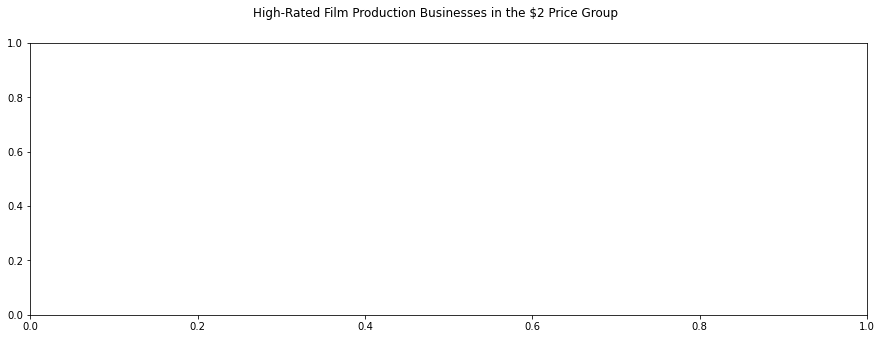

### Initial Takeaway

After cleaning, we can see a few interesting things to note:
- **There are 232 businesses in New York City, 41 in Atlanta, and *at least* 862 in Los Angeles**.

  Without jumping to conclusions, both a saturated market and a barren one may have advantages and disadvantages for a startup business.
   - A saturated market is very difficult to compete in, but we may be able to benefit by offering services that are *parallel* to businesses that are thriving there. E.g., we offer equipment rentals near a company that offers production services, or vice-versa. 
   - Additionally, were we to survive in the market to the point where we could scale, there are a multitude of other businesses close by that offer a variety of products or services that we may absorb to become a conglomerate. With there being such quantity and variety, we are more likely to find a company to buy that will fill in our needs precisely.
   - A market with sparse industry is only easy to compete in if there is a demand for our services. If there is demand, we could quickly grow to become the pinnacle of industry in that locale. If there is none, we starve.

- **The mean rating for film production businesses are highest in Los Angeles**.
  - Popularity aside, the key takeaway here is that, on average, the film production businesses are more beloved in LA than in either NYC or Atlanta.
    - It will be more difficult to get customers in this market, as customers here are already happy with what they have.
- By contrast, the average rating for film production businesses in New York are only marginally higher than in Atlanta.
  - NYC offers a larger market for film than Atlanta, while simultaneously having businesses that are negligibly more beloved.

- **The Review Count for businesses in New York have by far the highest standard deviation from the mean.**
  - Were we to plot businesses in NYC on a map and look at their review counts, we would see that there is a large disparity between how frequented the most popular production businesses are from the least frequented, all over the city.
  - Were we to open up shop in NYC, we *must* consider where we are opening business carefully! We could easily position ourselves next to a large production business that offers *different* services to ~~leech~~ develop a symbiotic relationship where their clients become our customers.
  - Conversely, businesses that are less frequented could be in a comercial dead-zone (and we should stay away from that precise area), *or* could simply not be good at attracting customers (and we could easily outcompete).
  
- There are not very many businesses that have a price listed with our dataset. This is unfortunate, as that data could be used to see how customer perception of how expensive a business is relates to the business's location, its popularity, and how loved it is by its customers.

Several fields are less useful for quantitative analysis, but help with identifying the business and seeing how Yelp manages their profiles.

**Location information** may be useful at some points after looking at the statistical data. Between regions, we can group our insights by region and compare how one compares to the others. Locally, we can compare businesses and see how proximity to other businesses, proximity to the population of consumers, and geographical qualities make an impact. 

For **quantitative analysis**, we have three primary areas to compare among businesses:
- **Price** — a measure of how expensive the business's products or services are, in the eyes of the Yelp reviewer/customer.
- **Review Count** — a measure of how *popular* the business is.
- **Rating** — a measure of how *beloved* the business is.

# Price

When evaluating our dataframes, it appears we have a lot of ```NaN``` values in the price column. Yelp actually lists their price with $ (which, of course, is not a number), but this has been corrected for in our ```parse_data(_)``` function, so every NaN is in fact an empty cell. Let's see how much data we have to work with if we drop the NaN values.

In [334]:
print('With NaNs: ',(len(df_fp_ny), len(df_fp_la), len(df_fp_ga)), 'Without NaNs: ',(len(df_fp_ny.dropna()), len(df_fp_la.dropna()), len(df_fp_ga.dropna())))

With NaNs:  (232, 862, 41) Without NaNs:  (6, 22, 1)


Yikes. That really limits our insight in to how these places compare as far as costs go! But lets see what we can take away with what we have.

#### Total Businesses per each Price Category
While price data is limited to a small sample of the population of our datasets, were we able to extrapolate this data to the population, we would have some insights. Los Angeles, for example, seems to be very competitive at lower price brackets.


This would make competing in such an environment as a start-up far more difficult, until we scale to the point to where we can secure talent and the ability to provide high-level services that are worthy of 4-dollar-sign prices. <br>

Looking at the total results per location's Yelp call is also informative. <br>
If the total number of production houses in Atlanta are much lower than the total in NYC and LA, then the market might be too saturated in the larger cities, making it difficult for new competition. 

Beyond the scope of this project, there are some other considerations that could be taken, such as: 
- commercial real estate prices per location (possibly through other API such as Zilliow)
- other costs of doing business per location
- resources available per location that will help in starting a business, i.e:
  - other businesses that may be resources to ours
  - tax incentives for film industry
  - a business-friendly regulator relationship

🥳


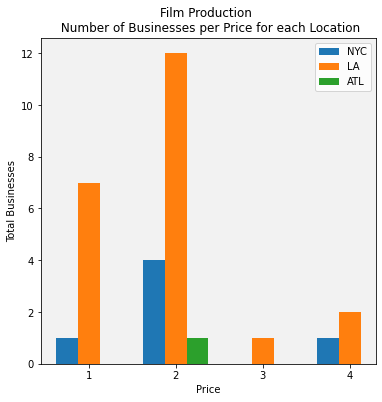

In [365]:
price_review_cnt_title = 'Film Production \n Number of Businesses per Price for each Location'
x_label = 'Price'
y_label = 'Total Businesses'
width = .25


x1 = df_fp_ny['Price'].dropna().value_counts().sort_index().index[:4]
y1 = df_fp_ny['Price'].dropna().value_counts().sort_index()

x2 = df_fp_la['Price'].dropna().value_counts().sort_index().index[:4]
y2 = df_fp_la['Price'].dropna().value_counts().sort_index()

x3 = df_fp_ga['Price'].dropna().value_counts().sort_index().index[:4]
y3 = df_fp_ga['Price'].dropna().value_counts().sort_index()

# xtik = [1, 2, 3, 4]

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlabel(x_label)
ax.set_ylabel(y_label);
ax.set_xticks([1, 2, 3, 4])
# ax.set_xticks(['$'*i for i in xtik])

ax.bar(x1-(width), y1, width, color = '#1F77B4', align='center')
ax.bar(x2, y2, width, color="#FF7F0E", align= 'center')
ax.bar(x3+(width), y3, width, color="#2CA02C", align= 'center')
ax.set_title(price_review_cnt_title)
ax.set_facecolor("#f2f2f2")

ax.legend(['NYC', 'LA', 'ATL'])
print('🥳')

In [336]:
print(df_fp_ny['Price'].median(), df_fp_la['Price'].median(), df_fp_ga['Price'].median())

2.0 2.0 2.0


In [337]:
# df_fp_ny['Price'].mode()
# df_fp_la['Price'].mode()
df_fp_ga['Price'].mode()

0    2.0
dtype: float64

### Insights:
- Price being listed only for a small sample of the population of our data suggests that insights here are not statistically significant, and could be a misleading representation of film production businesses for these locations.
- With that in mind, were we to extrapolate this sample data to population of our larger datasets, we would take away that **all** locations have the most reviews in the *second lowest* (2-\$) *price bracket* – their *mode*. 
- This 2-\$ bracket is also the *median* price bracket for **all** locations. This corrects for any potential outliers, where individual businesses that are not representative of the norm could skew average price for services offered by businesses in this industry.

### Takeaway
These insights indicate that in all locations, we would attract the most customers by targeting the 2-\$ price range    
  - in LA, the market is also fairly competitive in the 1-\$ price range.
  - this would mean that no matter how much we cut our prices in the LA market, there will likely be many other businesses who have priced their services just as low. 



## Rating / Review Count

🥳


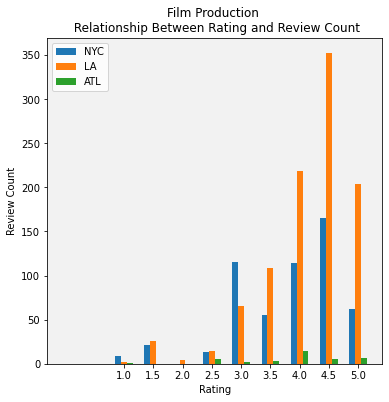

In [364]:
rating_review_cnt_title = 'Film Production \n Relationship Between Rating and Review Count'
x_label = 'Rating'
y_label = 'Review Count'
width = .1

x1 = df_fp_ny['Rating']
y1 = df_fp_ny['Review Count']

x2 = df_fp_la['Rating']
y2 = df_fp_la['Review Count']

x3 = df_fp_ga['Rating']
y3 = df_fp_ga['Review Count']

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlabel(x_label)
ax.set_ylabel(y_label);
ax.set_xticks([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

ax.bar(x1-(width), y1, width, color = '#1F77B4', align='center')
ax.bar(x2, y2, width, color ='#FF7F0E', align = 'center')
ax.bar(x3+(width), y3, width, color ='#2CA02C', align = 'center')
ax.set_title(rating_review_cnt_title)
ax.set_facecolor('#f2f2f2')

ax.legend(['NYC', 'LA', 'ATL'])
print('🥳')

Lets isolate businesses that have a high-rating in the 2-$ price bracket — The best for the median price.

# THE BUSINESSES REPRESENTED ON THE BELOW PLOT WOULD BE OUR PRIMARY COMPETITION OR BENEFACTORS

### Insights:

#### ^ Those above that are high on the y-axis are going to be the most difficult to compete with.

### THEY ARE OUR UNICORNS
- They would also be great businesses to develop parallel services to if we can develop in the same neighborhood.
- Alternatively, they would be a great reference model for our business develop far away.

### Takeaway

- From here it should be safe to only consider Los Angeles and New York, with favor given to New York. 
- Atlanta production & media service companies simply do not have enough insights from Yelp data alone to direct us towards a sound business plan. Without other data, we would simply be speculating.
- Los Angeles has plenty, yet with so many offering competitive low prices, it would be far more difficult to find an angle to distinguish us from the competition.
- LA's businesses also have a higher mean 'Rating' — they are more beloved and will be difficult to get the customers from ourselves if we offer similar services.
- New York also has a large market for media, and while not being as directed towards film, the variety of categories in the creative and commercial space, would likely allow us to find a better angle to maneuver, pivot, and adapt in the market.
- We also should not forget the higher standard deviation relating to 'Review Counts' in NYC. See further below.

Lets take a look at which businesses exactly were high on the y-axis (have a high *'Review Count'*)

In [340]:
ny_hr_p2

,Name,Address,City,Rating,Review Count,Coordinates,Price,Id,Categories
0,DiJiFi,"['1166 Manhattan Ave', 'Ste 201', 'Brooklyn, N...",Brooklyn,4.5,165,"{'latitude': 40.7382584, 'longitude': -73.9549...",2.0,CwBYC8nVLbG7KjVU6nwR4A,"[{'alias': 'photographystores', 'title': 'Phot..."
107,Transfer City USA,"['77 Lincoln Ave', 'Staten Island, NY 10306']",Staten Island,5.0,4,"{'latitude': 40.580222, 'longitude': -74.109705}",2.0,s2jNO0Zz1NUNTct02ZntrA,"[{'alias': 'photographystores', 'title': 'Phot..."
246,Hi Tech Studios,"['10 Grace Ave', 'Great Neck, NY 11021']",Great Neck,5.0,6,"{'latitude': 40.7881851196289, 'longitude': -7...",2.0,zTYY9V8rTg9WBX1z5jcW0A,"[{'alias': 'photographystores', 'title': 'Phot..."


In [341]:
la_hr_p2

,Name,Address,City,Rating,Review Count,Coordinates,Price,Id,Categories
31,Pro HD Rentals,"['2201 Hollywood Way', 'Ste 1', 'Burbank, CA 9...",Burbank,5.0,51,"{'latitude': 34.188555, 'longitude': -118.34928}",2.0,-vpcJktTviMd-K9xX-ZPww,"[{'alias': 'photographystores', 'title': 'Phot..."
63,Digital Video & Film Lab,"['401 Wilshire Blvd', 'Ste 1200', 'Santa Monic...",Santa Monica,5.0,44,"{'latitude': 34.01987, 'longitude': -118.49866}",2.0,_F1PHOY4T8cAshignwaHmQ,"[{'alias': 'videofilmproductions', 'title': 'V..."
92,Red Studios Hollywood,"['846 N Cahuenga Blvd', 'Los Angeles, CA 90038']",Los Angeles,4.0,12,"{'latitude': 34.08666, 'longitude': -118.32845}",2.0,JfzILyp_3R0Z_bX-hBLifA,"[{'alias': 'photographystores', 'title': 'Phot..."
213,AbelCine,"['801 S Main St', 'Burbank, CA 91506']",Burbank,4.0,18,"{'latitude': 34.1651614, 'longitude': -118.313...",2.0,pZOz0AZgT6qh5B1ghcVU_g,"[{'alias': 'photographystores', 'title': 'Phot..."
401,Argentum,"['6844 Vineland Ave', 'North Hollywood, CA 915...",North Hollywood,4.5,96,"{'latitude': 34.19516, 'longitude': -118.3697347}",2.0,01b6ADltxHQJPqNJxHYuIA,"[{'alias': 'photographystores', 'title': 'Phot..."
531,Makeup By Andi,"['Egg Harbor City, CA 90670']",Egg Harbor City,5.0,10,"{'latitude': 39.5311584472656, 'longitude': -7...",2.0,g6PSW69IzV60W1zQ1HIl3A,"[{'alias': 'makeupartists', 'title': 'Makeup A..."
790,Digital Imaging Center,"['10354 Venice Blvd', 'Culver City, CA 90232']",Culver City,4.0,24,"{'latitude': 34.0204621, 'longitude': -118.403...",2.0,KEQ2ycgDnMFr6RcZISIOvA,"[{'alias': 'photographystores', 'title': 'Phot..."
794,Santa Monica Camera,"['630 Wilshire Blvd', 'Santa Monica, CA 90401']",Santa Monica,4.5,98,"{'latitude': 34.020926, 'longitude': -118.495542}",2.0,TKsU7kvp8qwkwRKcGtbMoQ,"[{'alias': 'photographystores', 'title': 'Phot..."
859,FSP Designs,"['331 W Chestnut Ave', 'Monrovia, CA 91016']",Monrovia,5.0,19,"{'latitude': 34.142907249859036, 'longitude': ...",2.0,9E65ehtKepVGRgXpQbYUhQ,"[{'alias': 'screen_printing_tshirt_printing', ..."


In [342]:
ga_hr_p2 # Just to compare. Atlanta is out of the running.

,Name,Address,City,Rating,Review Count,Coordinates,Price,Id,Categories
39,Fallen Arrows,"['50 Waverly Way', 'Atlanta, GA 30307']",Atlanta,4.0,14,"{'latitude': 33.7552254, 'longitude': -84.3575...",2.0,brD9rXHvmpiXLu_0PFtT9w,"[{'alias': 'graphicdesign', 'title': 'Graphic ..."


#### Let's reiterate our initial takeaways:

    - Were we to plot businesses in NYC on a map and look at their review counts, we would see that there is a large disparity between how frequented the most popular production businesses are from the least frequented, all over the city.
    - Were we to open up shop in NYC, we must consider where we are opening business carefully! We could easily position ourselves next to a large production business that offers different services to develop a 
    symbiotic relationship where their clients become our customers.
    - Conversely, businesses that are less frequented could be in a comercial dead-zone (and we should stay away from that precise area), or could simply not be good at attracting customers (and we could easily outcompete).

### Let's look at that NYC Unicorn, DiJiFi a little closer:

In [377]:
m = folium.Map(location=[40.7382584, -73.9549], tiles="Stamen Toner", zoom_start=13)

folium.Circle(
    radius=100,
    location=[40.7382584, -73.9549],
    popup='DiJiFi',
    color="crimson",
    fill=False,
).add_to(m)


folium.CircleMarker(
    location=[40.7382584, -73.9549],
    radius=50,
    popup="DiJiFi",
    color="#1F77B4",
    fill=True,
    fill_color="#3186cc",
    tooltip = 'DiJiFi',
).add_to(m)


m

In [388]:
len("{'latitude': ")

13

In [419]:
len('{\'latitude\': 40.7382584, \'longitude\': ')

38

In [391]:
df_fp_ny['Coordinates'][0]

"{'latitude': 40.7382584, 'longitude': -73.9549479}"

In [422]:
df_fp_ny['Coordinates'][15][38:-2]

'73.95587'

In [412]:
lats = []
for i in df_fp_ny['Coordinates']:
    latitude = float(i[13:18])
    lats.append(latitude)
df_fp_ny['Latitude'] = lats

In [413]:
df_fp_ny['Latitude']

0      40.73
1      40.79
2      40.70
3      40.68
4      40.67
       ...  
292    39.99
293    40.30
294    41.25
295    40.00
296    37.77
Name: Latitude, Length: 232, dtype: float64

In [423]:
longs = []
for i in df_fp_ny['Coordinates']:
    longitude = float(i[38:-2])
    longs.append(longitude)
df_fp_ny['Longitude'] = longs

ValueError: could not convert string to float: "ude': -73.975196838378"

In [378]:
m = folium.Map(location=[40.7382584, -73.9549], tiles="Stamen Toner", zoom_start=13)

folium.Circle(
    radius=100,
    location=[40.7382584, -73.9549],
    popup='DiJiFi',
    color="crimson",
    fill=False,
).add_to(m)


folium.CircleMarker(
    location=[40.7382584, -73.9549],
    radius=50,
    popup="DiJiFi",
    color="#1F77B4",
    fill=True,
    fill_color="#3186cc",
    tooltip = 'DiJiFi',
).add_to(m)


m

### Takeaways

# Conclusion and Further Considerations

Further considerations in our analysis include
- commercial real estate prices per location (possibly through other API such as Zilliow)
- other costs of doing business per location
- resources available per location that will help in starting a business, i.e:
- other businesses that may be resources to ours
- tax incentives for film industry
- a business-friendly regulator relationship

<br><br><br><br><br><br><br><br><br><br><br><br>